In [228]:
#Exploring nearest neighbors

using Plots

function f(a)
    return sin(10a)
end

xs = rand(30)
ys = f.(xs)
x = range(0, stop=1, length=500)
y = f.(x)

500-element Vector{Float64}:
  0.0
  0.020038738821815002
  0.040069430259003856
  0.06008403015870064
  0.08007450083026207
  0.1000328142731347
  0.1199509554008307
  0.13982092525971743
  0.15963474424132812
  0.17938445528690405
  0.1990621270828803
  0.2186598572460333
  0.2381697754970093
  ⋮
 -0.3473851599814287
 -0.3661061834844305
 -0.3846801819027347
 -0.40309969607882395
 -0.4213573288947201
 -0.43944574824260235
 -0.45735768996931886
 -0.4750859607936063
 -0.49262344119485596
 -0.509963088272242
 -0.5270979385730965
 -0.5440211108893698

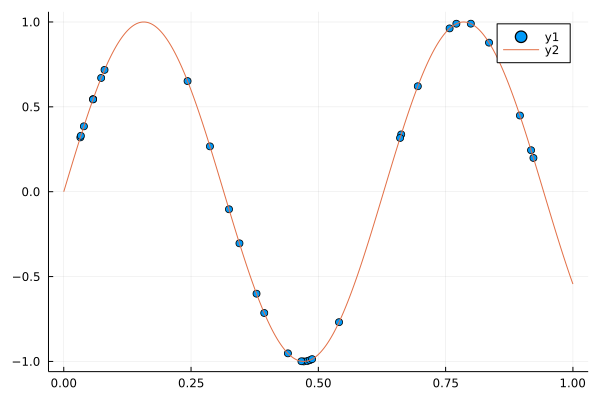

In [233]:
plot(xs, ys, seriestype = :scatter)
plot!(x, y)

In [232]:
A = zeros(30, 3)
for i in 1:30
    A[i,1] = xs[i]
    A[i,2] = ys[i]
end

function knn(a, k)
    A[:, 3] = (A[:, 1] .- a).^2
    sorted = sortslices(A, dims=1, by = x->x[3])
    return sum(sorted[1:k, 2])/k
end

y_knn1 = knn.(x, 1)
y_knn2 = knn.(x, 2)
y_knn3 = knn.(x, 3)

500-element Vector{Float64}:
 0.34486960063143085
 0.34486960063143085
 0.34486960063143085
 0.34486960063143085
 0.34486960063143085
 0.34486960063143085
 0.34486960063143085
 0.34486960063143085
 0.34486960063143085
 0.34486960063143085
 0.34486960063143085
 0.34486960063143085
 0.34486960063143085
 ⋮
 0.2974711216322326
 0.2974711216322326
 0.2974711216322326
 0.2974711216322326
 0.2974711216322326
 0.2974711216322326
 0.2974711216322326
 0.2974711216322326
 0.2974711216322326
 0.2974711216322326
 0.2974711216322326
 0.2974711216322326

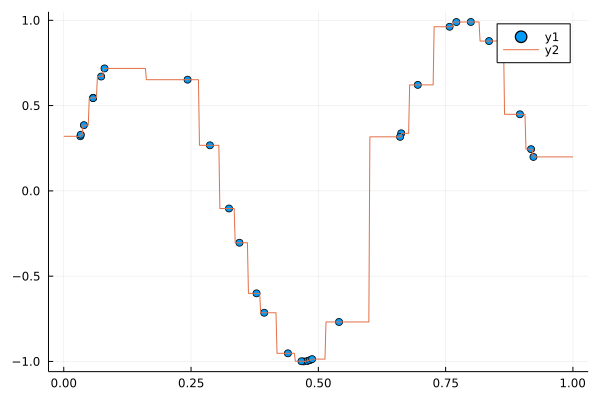

In [231]:
#k=1
plot(xs, ys, seriestype = :scatter)
plot!(x, y_knn1)

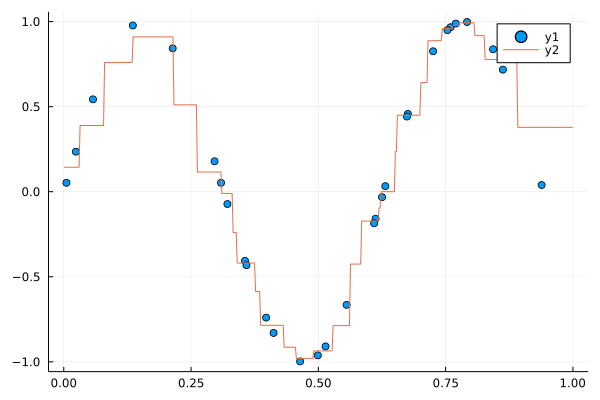

In [208]:
#k=2
plot(xs, ys, seriestype = :scatter)
plot!(x, y_knn2)

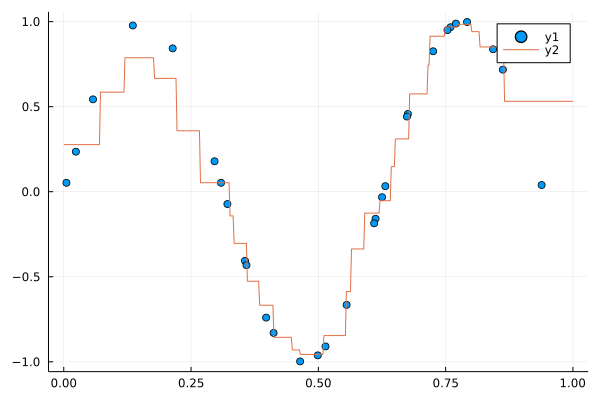

In [209]:
#k=3
plot(xs, ys, seriestype = :scatter)
plot!(x, y_knn3)

In [269]:
import LinearAlgebra

function snn(a, rho)
    exp_w = exp.(-(xs .- a).^2/rho)
    w = exp_w/sum(exp_w)
    return sum(w .* ys)
end

y_snn1 = snn.(x, sqrt(0.0001))
y_snn2 = snn.(x, sqrt(0.0003))
y_snn3 = snn.(x, sqrt(0.001))
y_snn4 = snn.(x, sqrt(0.003))
y_snn5 = snn.(x, sqrt(0.01))

500-element Vector{Float64}:
 0.2877767062800906
 0.2854941861488193
 0.28319150459547143
 0.28086864500947867
 0.27852559461995946
 0.2761623445716923
 0.27377889000090366
 0.2713752301108227
 0.2689513682469523
 0.2665073119719997
 0.2640430731404181
 0.2615586679725002
 0.2590541171279706
 ⋮
 0.4519540697214189
 0.4532279791829727
 0.4544806926548809
 0.4557123492767688
 0.4569230893423533
 0.4581130542436902
 0.45928238641628455
 0.46043122928506075
 0.46155972721120353
 0.4626680254398652
 0.4637562700487477
 0.4648246078975577

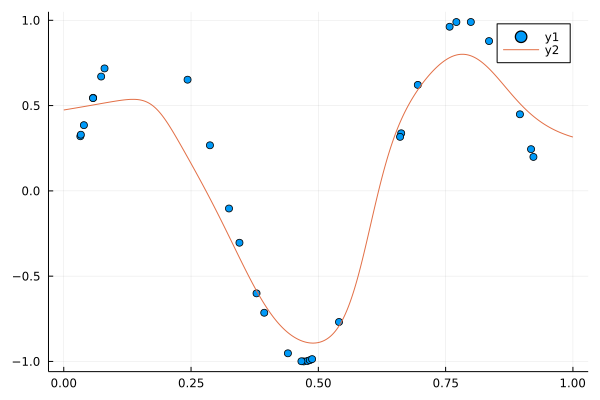

In [270]:
#rho=sqrt(0.0001)
plot(xs, ys, seriestype = :scatter)
plot!(x, y_snn1)

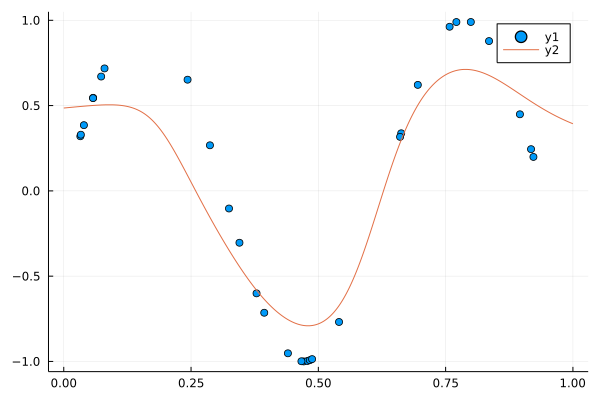

In [258]:
#rho=sqrt(0.0003)
plot(xs, ys, seriestype = :scatter)
plot!(x, y_snn2)

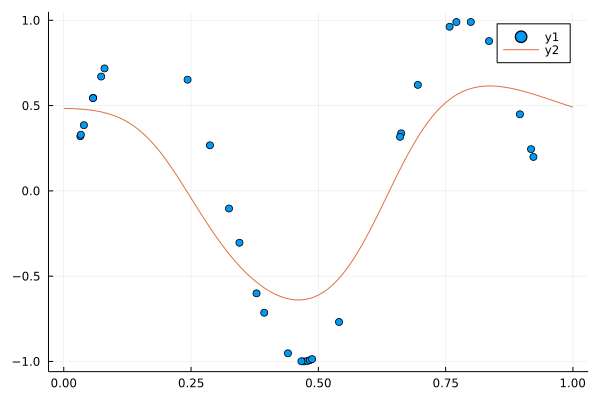

In [259]:
#rho=sqrt(0.001)
plot(xs, ys, seriestype = :scatter)
plot!(x, y_snn3)

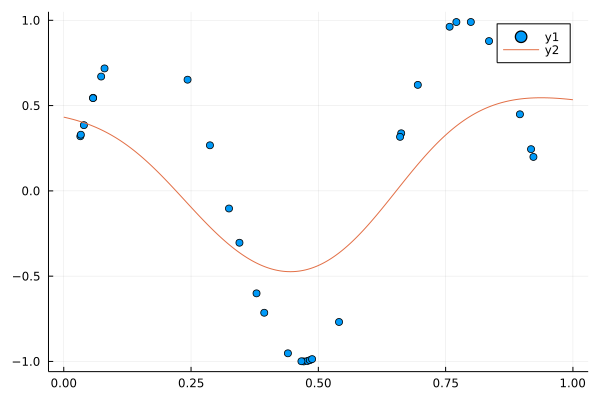

In [260]:
#rho=sqrt(0.003)
plot(xs, ys, seriestype = :scatter)
plot!(x, y_snn4)

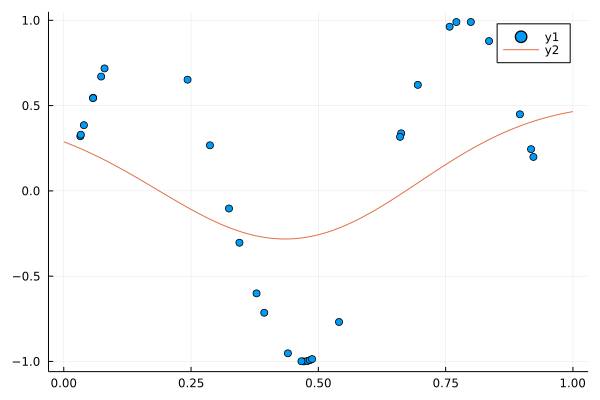

In [261]:
#rho=sqrt(0.01)
plot(xs, ys, seriestype = :scatter)
plot!(x, y_snn5)

In [267]:
function rms(y, yhat)
    return sqrt(sum((yhat .- y).^2)/500)
end

println(rms(y, y_knn1))
println(rms(y, y_knn2))
println(rms(y, y_knn3))
println(rms(y, y_snn1))
println(rms(y, y_snn2))
println(rms(y, y_snn3))
println(rms(y, y_snn4))
println(rms(y, y_snn5))

0.20082148087961588
0.2162239632505256
0.251969956535231
0.2804597233177975
0.3361452908195157
0.41707944857757084
0.5022680810704847
0.5880566406133741
